# 多断片法

In [59]:
C={}
n=1000 # 1000都市に変更
import random
for i in range(n):
  x=random.randint(0,10000)
  y=random.randint(0,10000)
  C[i]=(x,y)
print(C)

# テスト用：n=10, Cを0-30の位置に設定する
# C = {0:(25,30),1:(15,25),2:(23,28),3:(9,29),4:(13,17),5:(12,23),6:(8,15),7:(1,27),8:(25,15),9:(13,28)}
# print(C)

{0: (1964, 9063), 1: (8946, 47), 2: (8187, 3007), 3: (1843, 7740), 4: (9471, 2537), 5: (3016, 8210), 6: (5567, 164), 7: (2283, 6956), 8: (3433, 3745), 9: (4625, 2681), 10: (1901, 1226), 11: (3675, 4846), 12: (6033, 9634), 13: (5018, 2749), 14: (519, 6769), 15: (598, 144), 16: (7643, 2028), 17: (4901, 8626), 18: (6721, 6279), 19: (9368, 1049), 20: (5371, 1825), 21: (6720, 2392), 22: (2171, 183), 23: (2054, 2699), 24: (2128, 3738), 25: (4821, 1194), 26: (9094, 5783), 27: (460, 1227), 28: (7329, 5603), 29: (597, 3022), 30: (2345, 4799), 31: (9368, 9266), 32: (3566, 6160), 33: (2319, 2678), 34: (7105, 506), 35: (7321, 5361), 36: (6689, 408), 37: (6135, 4431), 38: (8604, 6880), 39: (6826, 4463), 40: (4746, 4282), 41: (7681, 3973), 42: (7159, 2811), 43: (4389, 6772), 44: (4308, 9010), 45: (3874, 100), 46: (1343, 5284), 47: (8864, 1787), 48: (3164, 4990), 49: (7471, 8427), 50: (3029, 2516), 51: (7045, 7296), 52: (7444, 5801), 53: (1076, 7998), 54: (9361, 2506), 55: (7634, 4366), 56: (6056, 61

In [60]:
def distance(pa,pb):
  return ((pa[0]-pb[0])**2+(pa[1]-pb[1])**2)**0.5

def graph_of_tour(tour,C):
  Gt=nx.Graph()
  for i in range(len(tour)):
    ci = tour[i]
    if i == len(tour)-1:
      cj = tour[0]
    else:
      cj = tour[i+1]

    Gt.add_edge(ci,cj,weight=distance(C[ci],C[cj]))
  return Gt

In [61]:
import networkx as nx
G=nx.Graph()
for c1 in C:
  for c2 in C:
    if c1 != c2:
      G.add_edge(c1,c2,weight=distance(C[c1],C[c2]))

## 多断片法の実装

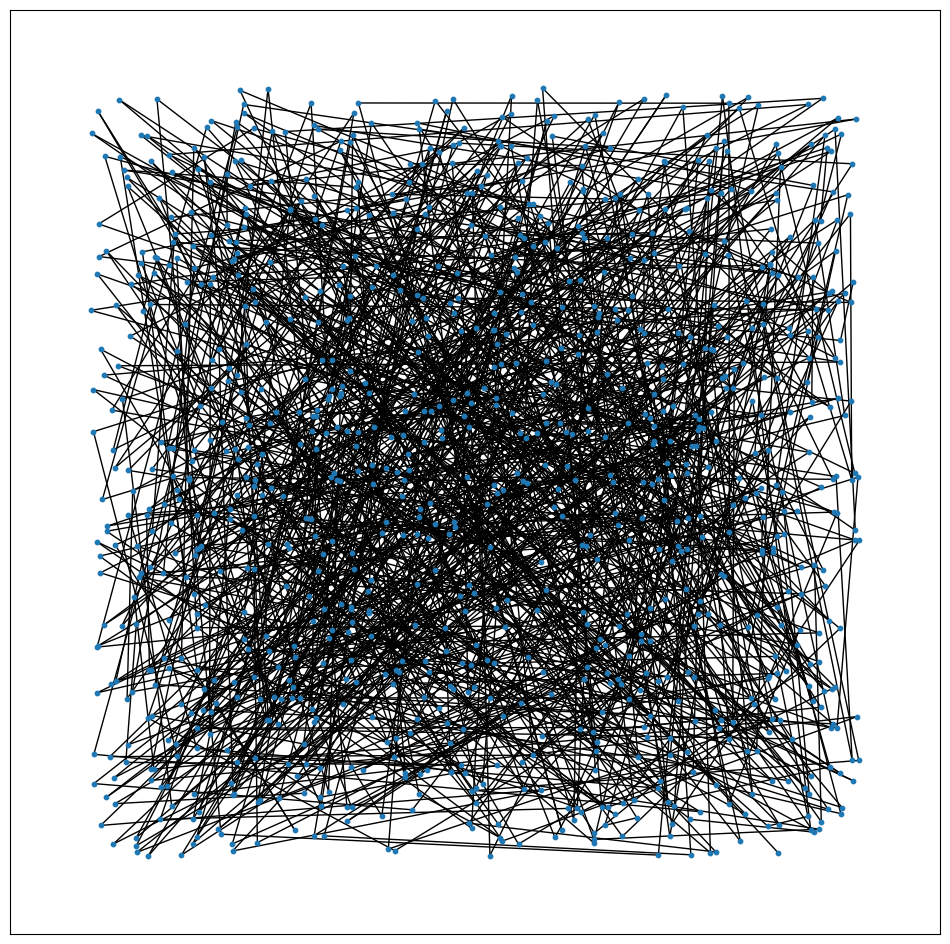

In [ ]:
Esol = []
Erest= [(distance(C[i],C[j]),(i,j)) for i in C for j in C if i < j]
delta=[0] * len(C)
theta=[i for i in C]
while len(Esol) <len(C)-1:
  duv,(u,v) = Erest.pop()
  if delta[u] == 2 or delta[v] == 2:
    continue
  elif delta[u] ==1 and theta[u] == v:
    continue
  else:
    Esol.append((u,v))
    delta[u] += 1
    delta[v] += 1
    p,q = theta[u], theta[v]
    theta[p] = q
    theta[q] = p

# 描画
Gsol = nx.Graph()
Gsol.add_edges_from(Esol)
node_positions = nx.get_node_attributes(Gsol, 'pos')

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.axis("equal")

nx.draw_networkx(Gsol,pos=C,node_size=10,with_labels=False)